In [528]:
#1 Pobierz bazę danych dotyczącą śmiertelnych interwencji policji w USA, a następnie wczytaj ją do obiektu DataFrame.
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('fatal-police-shootings-data.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [529]:
#2 Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego,
# czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’).
from unicodedata import name


data=df.pivot_table(values = 'name',  index = ['race'], columns=['signs_of_mental_illness'], aggfunc = 'count')
data1 = data.rename(columns={'name':'body count'})
data1



signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


In [530]:
print(data1.columns.tolist())

[False, True]


In [531]:
#3 Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. 
# Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.


data1['%']=data1.apply(lambda x: x[True]/(x[True]+x[False])*100, axis=1).round(2)
data1

signs_of_mental_illness,False,True,%
race,,,
A,69,24,25.81
B,1114,184,14.18
H,745,157,17.41
N,64,14,17.95
O,37,11,22.92
W,1763,713,28.80


In [532]:
data1['%'].idxmax()

'W'

In [533]:
#4 Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. 
# Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.
df['Day of Week'] = pd.to_datetime(df['date'])
df['Day of Week']= df['Day of Week'].dt.day_name()
df.head()


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Day of Week
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday


In [534]:
data2=df['Day of Week'].value_counts()
data2


Wednesday    829
Tuesday      816
Thursday     810
Friday       761
Sunday       753
Monday       726
Saturday     721
Name: Day of Week, dtype: int64

<AxesSubplot:xlabel='day of week', ylabel='number of shootings'>

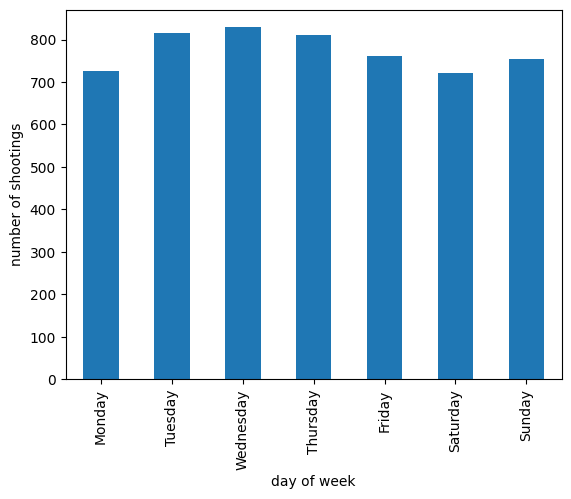

In [535]:
#4 wykres
data3=data2.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
data3.plot(kind='bar', ylabel = 'number of shootings', xlabel = 'day of week')


In [536]:
#5 Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. 
# Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.
data4 = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)
data4[0].head()
data8=data4[0]
population = data8[['Population estimate, July 1, 2019[2]', 'State']].rename(columns={'Population estimate, July 1, 2019[2]':'Population', 'State':'state_long'})



In [537]:
data6 = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=0)
#data6[0].head()
data9=data6[0]
data10=data9[['Codes:  ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2)  ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2)  USPS 2-letter codes used by the United States Postal Service  USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations:  GPO Older variable-length official US Government Printing Office abbreviations  AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).5', 'Codes:  ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2)  ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2)  USPS 2-letter codes used by the United States Postal Service  USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations:  GPO Older variable-length official US Government Printing Office abbreviations  AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP)']]
data11 = data10.rename(columns={'Codes:  ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2)  ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2)  USPS 2-letter codes used by the United States Postal Service  USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations:  GPO Older variable-length official US Government Printing Office abbreviations  AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).5':'state', 'Codes:  ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2)  ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2)  USPS 2-letter codes used by the United States Postal Service  USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations:  GPO Older variable-length official US Government Printing Office abbreviations  AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP)':'state_long'})
data12=data11.dropna(subset=['state'])


In [538]:
def make_keys(n):
    return [f'key{n}' for n in range(n)]
left = df.copy()
left['key'] = make_keys(5416)
right = data12.copy()
right['key'] = make_keys(69)


df1=df.merge(data12, on='state', how='left')


In [539]:
def make_keys(n):
    return [f'key{n}' for n in range(n)]
left = df1.copy()
left['key'] = make_keys(5416)
right = population.copy()
right['key'] = make_keys(60)


df2=df1.merge(population, on='state_long', how='left')
df2.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Day of Week,state_long,Population
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday,Washington,7614893
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday,Oregon,4217737
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday,Kansas,2913314
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday,California,39512223
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday,Colorado,5758736


In [540]:
df3=df2.pivot_table(values = 'name',  index = ['state_long', 'Population'], aggfunc = 'count')
df3.head()


,,name
state_long,Population,
Alabama,4903185,104
Alaska,731545,39
Arizona,7278717,254
Arkansas,3017825,83
California,39512223,799


In [541]:
def make_keys(n):
    return [f'key{n}' for n in range(n)]
left = df3.copy()
left['key'] = make_keys(51)
right = df2['Population'].copy()
right['key'] = make_keys(60)


df4=df3.merge(population, on='state_long', how='left')
df4.head()
df4['kill per 1000 ']=df4.apply(lambda x: x['name']/(x['Population']/1000), axis=1).round(4)
df4.head()

,state_long,name,Population,kill per 1000
0,Alabama,104,4903185,0.0212
1,Alaska,39,731545,0.0533
2,Arizona,254,7278717,0.0349
3,Arkansas,83,3017825,0.0275
4,California,799,39512223,0.0202
